In [1]:
import pandas as pd
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

In [2]:
path1 = r"D:\IMARTICUS\mask no mask"
cate = ['Mask','No_Mask']

In [3]:
image_size = 200 
input_image = []    
for i in cate:
    folders = os.path.join(path1 ,i)
    label   = cate.index(i)     # 0 , 1 
    for image in os.listdir(folders):
        image_path  = os.path.join(folders , image)
        image_array =  cv2.imread(image_path) 
        image_array =cv2.resize(image_array , (image_size  , image_size) ) 
        input_image.append([image_array , label]) 

In [8]:
len(input_image)   

8456

In [9]:
np.random.shuffle(input_image)

In [10]:
x= []
y= []
for i , j in input_image:
    x.append(i)
    y.append(j)

In [11]:
len(x)

8456

In [12]:
x_train = x[0:6700]
y_train = y[0:6700]
x_test = x[6700::]
y_test = y[6700::]

In [13]:
print(len(x_train))
print(len(y_train)) 
print(len(x_test)) 
print(len(y_test)) 

6700
6700
1756
1756


In [14]:
len(y)

8456

In [15]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [16]:
x_train.shape

(6700, 200, 200, 3)

In [17]:
y_train = np.array(y_train)

In [18]:
y_train.shape

(6700,)

In [19]:
x_train =x_train/255
x_test =x_test/255

In [20]:
x_train.shape

(6700, 200, 200, 3)

In [21]:
y_train.shape

(6700,)

In [22]:
type(y_train)

numpy.ndarray

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout 

In [24]:
model = Sequential()
model.add(Conv2D(filters = 64 , kernel_size =(5,5) , activation ='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu' , input_shape = x_train.shape[1:]))
model.add(Dense(2 , activation= 'softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [25]:
model.fit(x_train , y_train , batch_size = 64 ,  validation_split  =.2 ,epochs = 6)

Epoch 1/6
84/84 [==============================] - 196s 2s/step - loss: 1.4908 - accuracy: 0.8313 - val_loss: 0.2906 - val_accuracy: 0.9052
Epoch 2/6
84/84 [==============================] - 175s 2s/step - loss: 0.2932 - accuracy: 0.8916 - val_loss: 0.2514 - val_accuracy: 0.9104
Epoch 3/6
84/84 [==============================] - 181s 2s/step - loss: 0.1473 - accuracy: 0.9483 - val_loss: 0.2500 - val_accuracy: 0.9112
Epoch 4/6
84/84 [==============================] - 179s 2s/step - loss: 0.0920 - accuracy: 0.9662 - val_loss: 0.2756 - val_accuracy: 0.9075
Epoch 5/6
84/84 [==============================] - 182s 2s/step - loss: 0.0589 - accuracy: 0.9834 - val_loss: 0.2717 - val_accuracy: 0.9224
Epoch 6/6
84/84 [==============================] - 185s 2s/step - loss: 0.0526 - accuracy: 0.9853 - val_loss: 0.2864 - val_accuracy: 0.9194


In [26]:
pred_test_proba = model.predict(x_test)
pred_test_proba

55/55 [==============================] - 11s 203ms/step


array([[9.9820936e-01, 1.7907005e-03],
       [9.9831259e-01, 1.6873971e-03],
       [9.9703997e-01, 2.9600200e-03],
       ...,
       [9.9997389e-01, 2.6082915e-05],
       [7.8547135e-04, 9.9921453e-01],
       [5.5316281e-01, 4.4683725e-01]], dtype=float32)

In [27]:
len(pred_test_proba)

1756

In [28]:
pred_test = np.argmax(pred_test_proba, axis=1)
pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
len(pred_test)

1756

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
import seaborn as sns

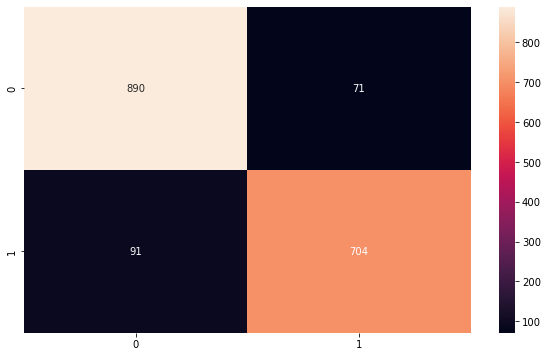

In [32]:
conmat = confusion_matrix(y_test, pred_test)
plt.figure(figsize = (10, 6))
sns.heatmap(conmat, annot = True, fmt="d",
            xticklabels=['0', '1'],
            yticklabels=['0', '1']);

In [33]:
accuracy = accuracy_score(y_test, pred_test)*100
accuracy

90.7744874715262

In [34]:
model.save("face_mask_detection.h5")

In [35]:
pwd

'C:\\Users\\Akshay\\For Github'